In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
pd.set_option("display.max_columns",100)

In [10]:
inspect = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [117]:
inspect.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41686218,BEIT JEDDO,BROOKLYN,6917,5 AVENUE,11209,7189211120,Middle Eastern,04/06/2013,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12.0,NaN,NaN,06/16/2016,Pre-permit (Operational) / Initial Inspection
1,40931239,PIO PIO EXPRESS,MANHATTAN,1746,1 AVENUE,10128,2124265800,Peruvian,07/21/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,28.0,NaN,NaN,06/16/2016,Cycle Inspection / Initial Inspection


^ Points to differences and inconsistencies in counting types amongst the boroughs.

In [77]:
r_boro_g = inspect.groupby(['CUISINE DESCRIPTION', 'SCORE'])['CAMIS'].count().unstack('CUISINE DESCRIPTION')

In [118]:
# r_boro_g

In [51]:
inspect[(inspect['BORO'] == 'STATEN ISLAND') & (inspect['CUISINE DESCRIPTION'] == 'Vegetarian')]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE


In [115]:
# sns.violinplot(data=inspect[['CUISINE DESCRIPTION', 'SCORE']].T.unstack("SCORE"), palette="Set3", bw=.2, cut=1, linewidth=1)

In [116]:
# inspect[['CUISINE DESCRIPTION', 'SCORE']].set_index("CUISINE DESCRIPTION")

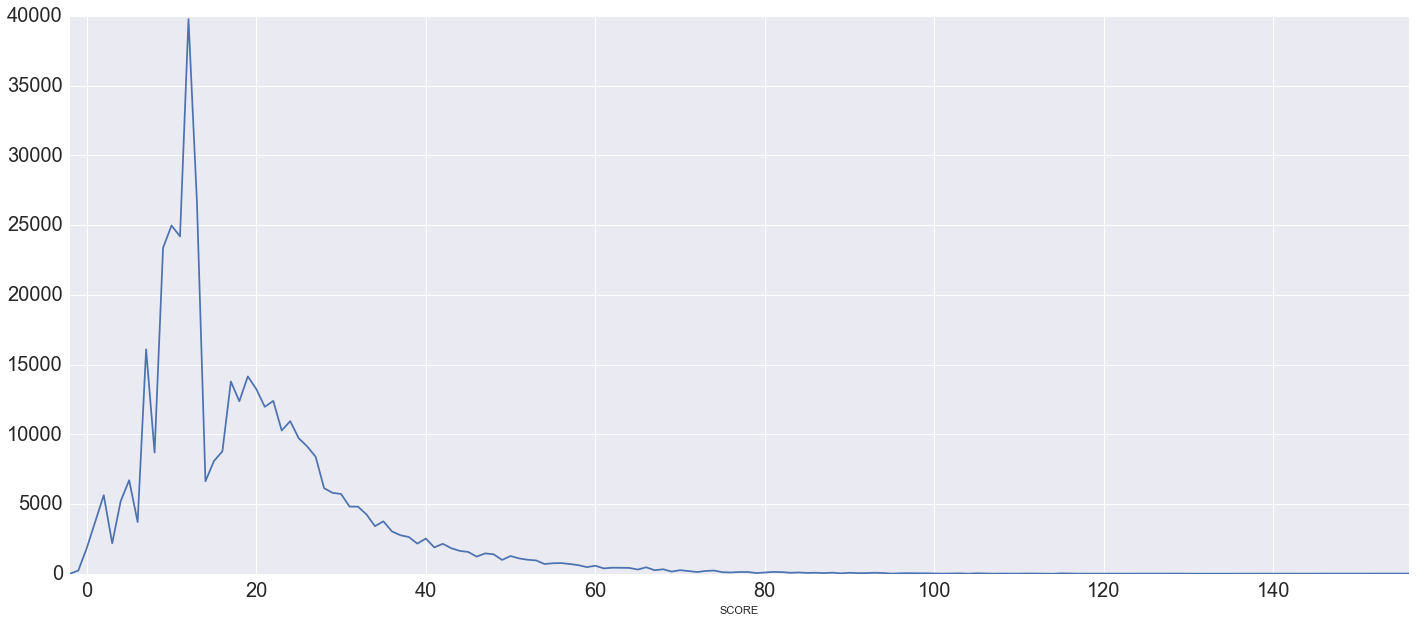

In [30]:
inspect.groupby(['SCORE']).count()['CAMIS'].plot(figsize=(24, 10), fontsize=20)

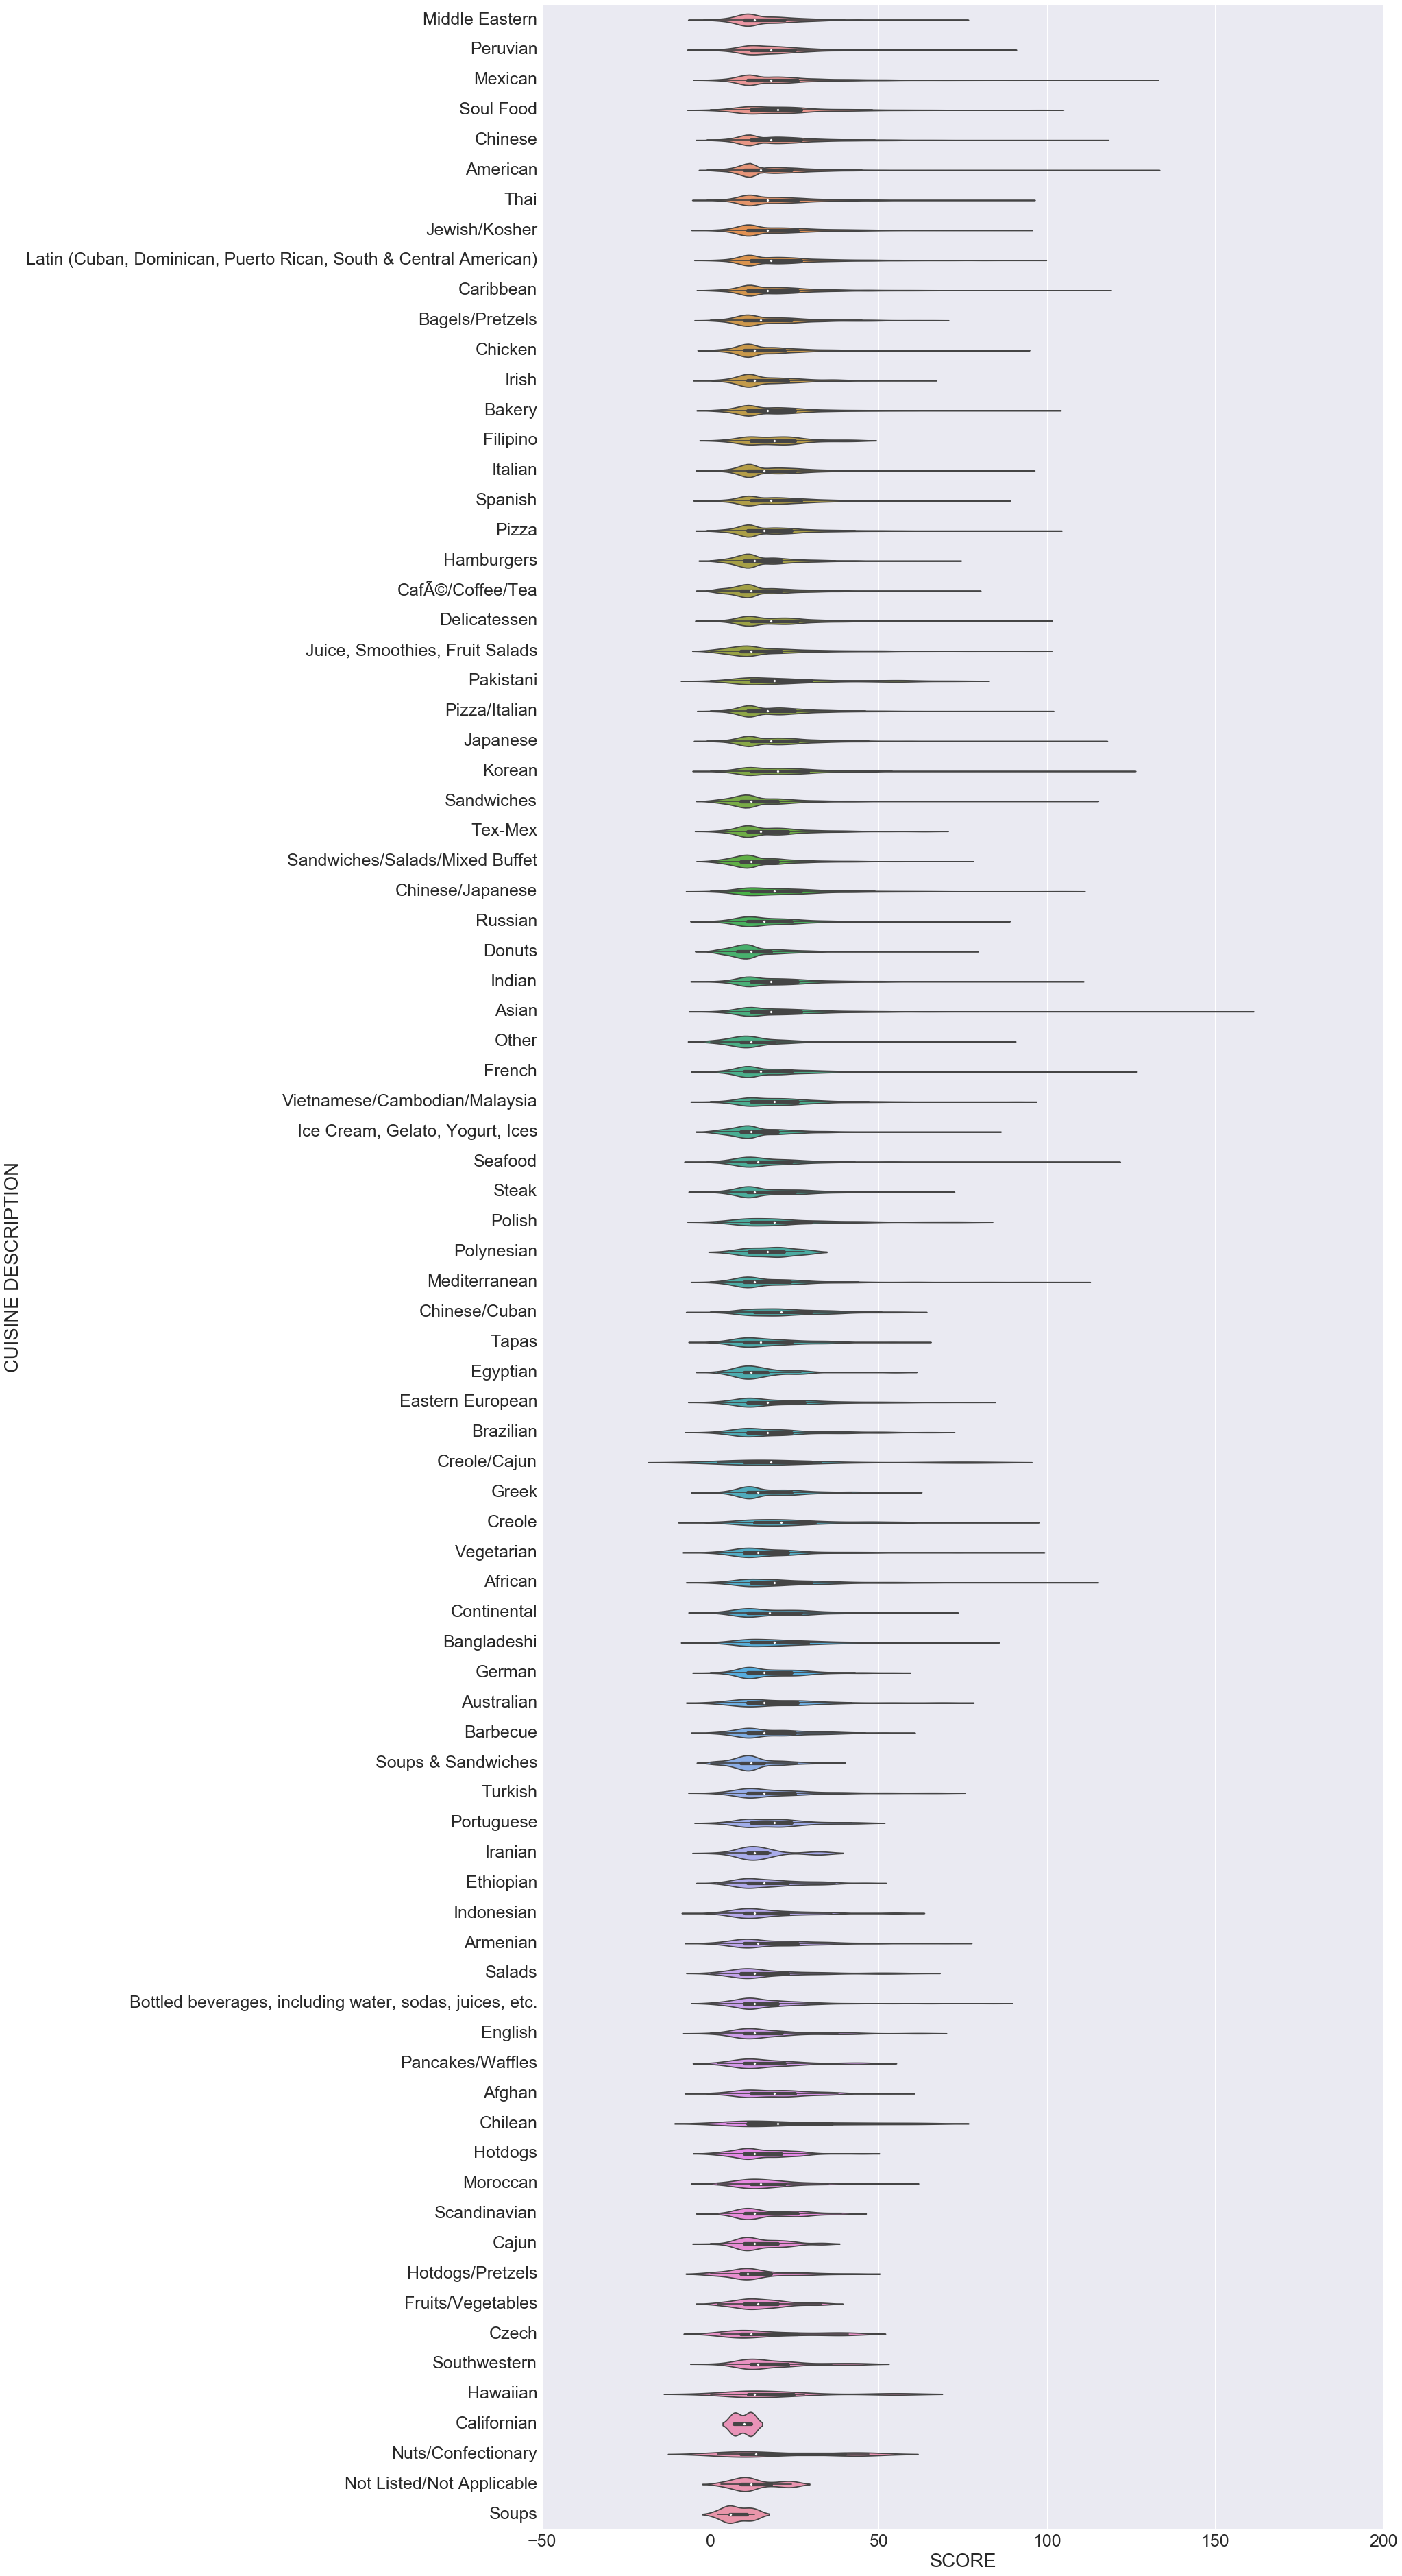

In [162]:
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(22, 66))
# ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=20)
# ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=30)
# ax.set_yticklabels(ax.yaxis.get_majorticklabels(), fontsize=30)
# ax.set_yticklabels(ax0.yaxis.get_majorticklabels(), rotation=0, fontsize=fontsize)
sns.violinplot(x=inspect['SCORE'], y=inspect['CUISINE DESCRIPTION'])